In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('dataset.csv')

In [124]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [126]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [127]:
df.shape

(1190, 12)

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [129]:
import warnings
warnings.filterwarnings("ignore")

In [130]:
df['target'].value_counts(normalize=True)

,proportion
target,
1,0.528571
0,0.471429


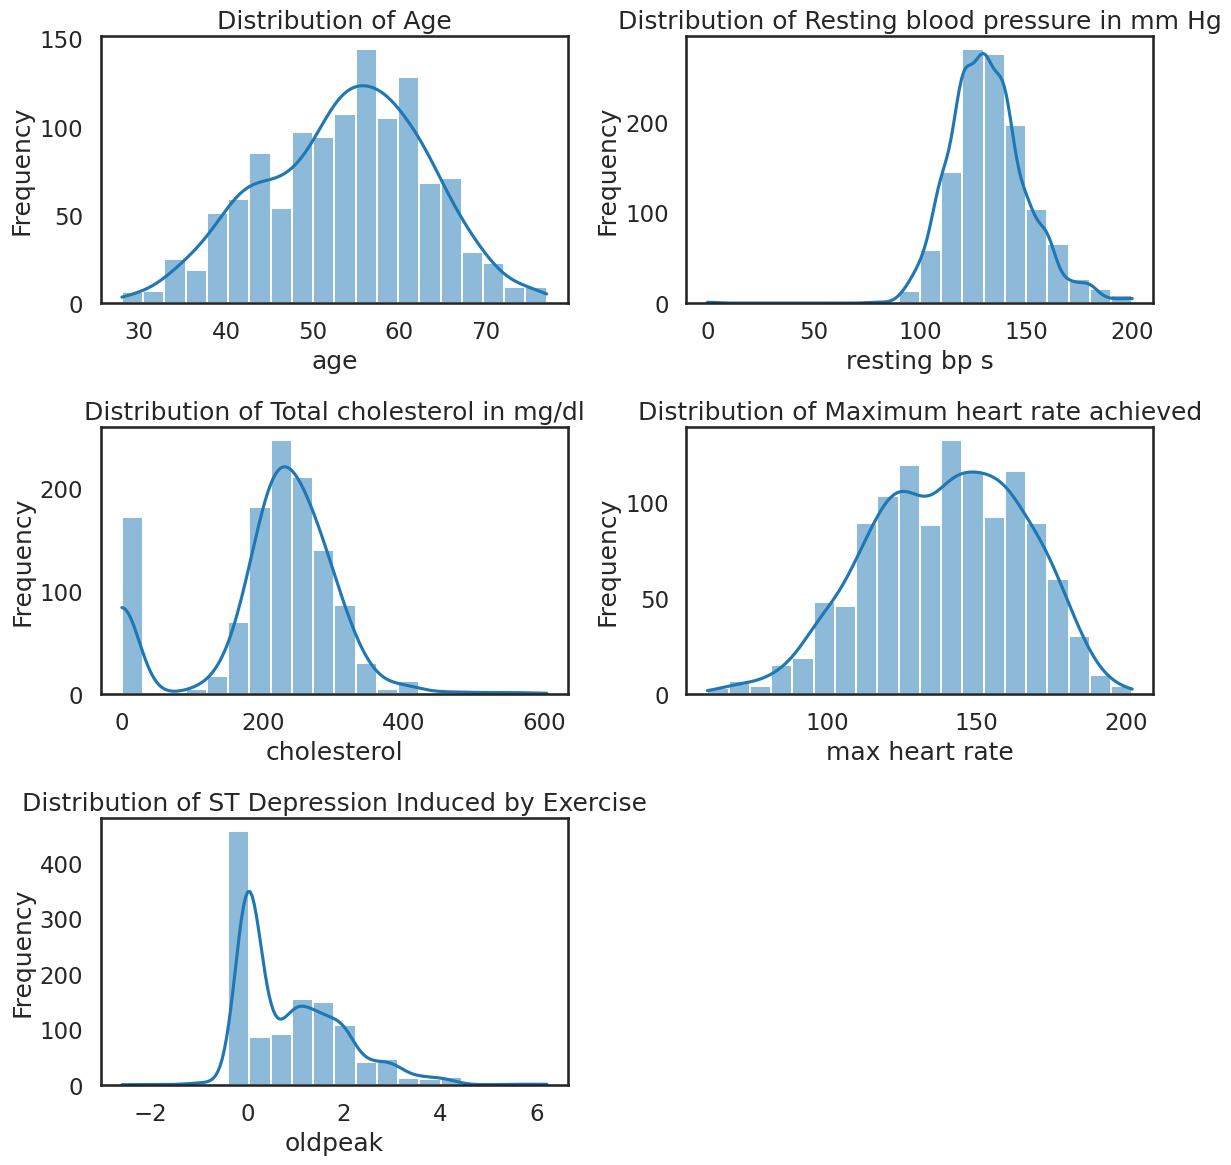

In [131]:
num_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
labels = ['Age', 'Resting blood pressure in mm Hg', 'Total cholesterol in mg/dl', 'Maximum heart rate achieved', 'ST Depression Induced by Exercise']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(num_columns, labels)):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {label}')

axes[-1].axis('off')

plt.tight_layout()
plt.show()


Here, we can spot few problems. Column 'Cholesterol' has a high amount of zeros, which is impossible.
Resting blood pressure of a person can never be 0, but our data have few zeros.
And 'Oldpeak' has a lot zero values, but ST depression can be 0 mV, and is the standard criterion for an abnormal response. The problem that it has negative values.

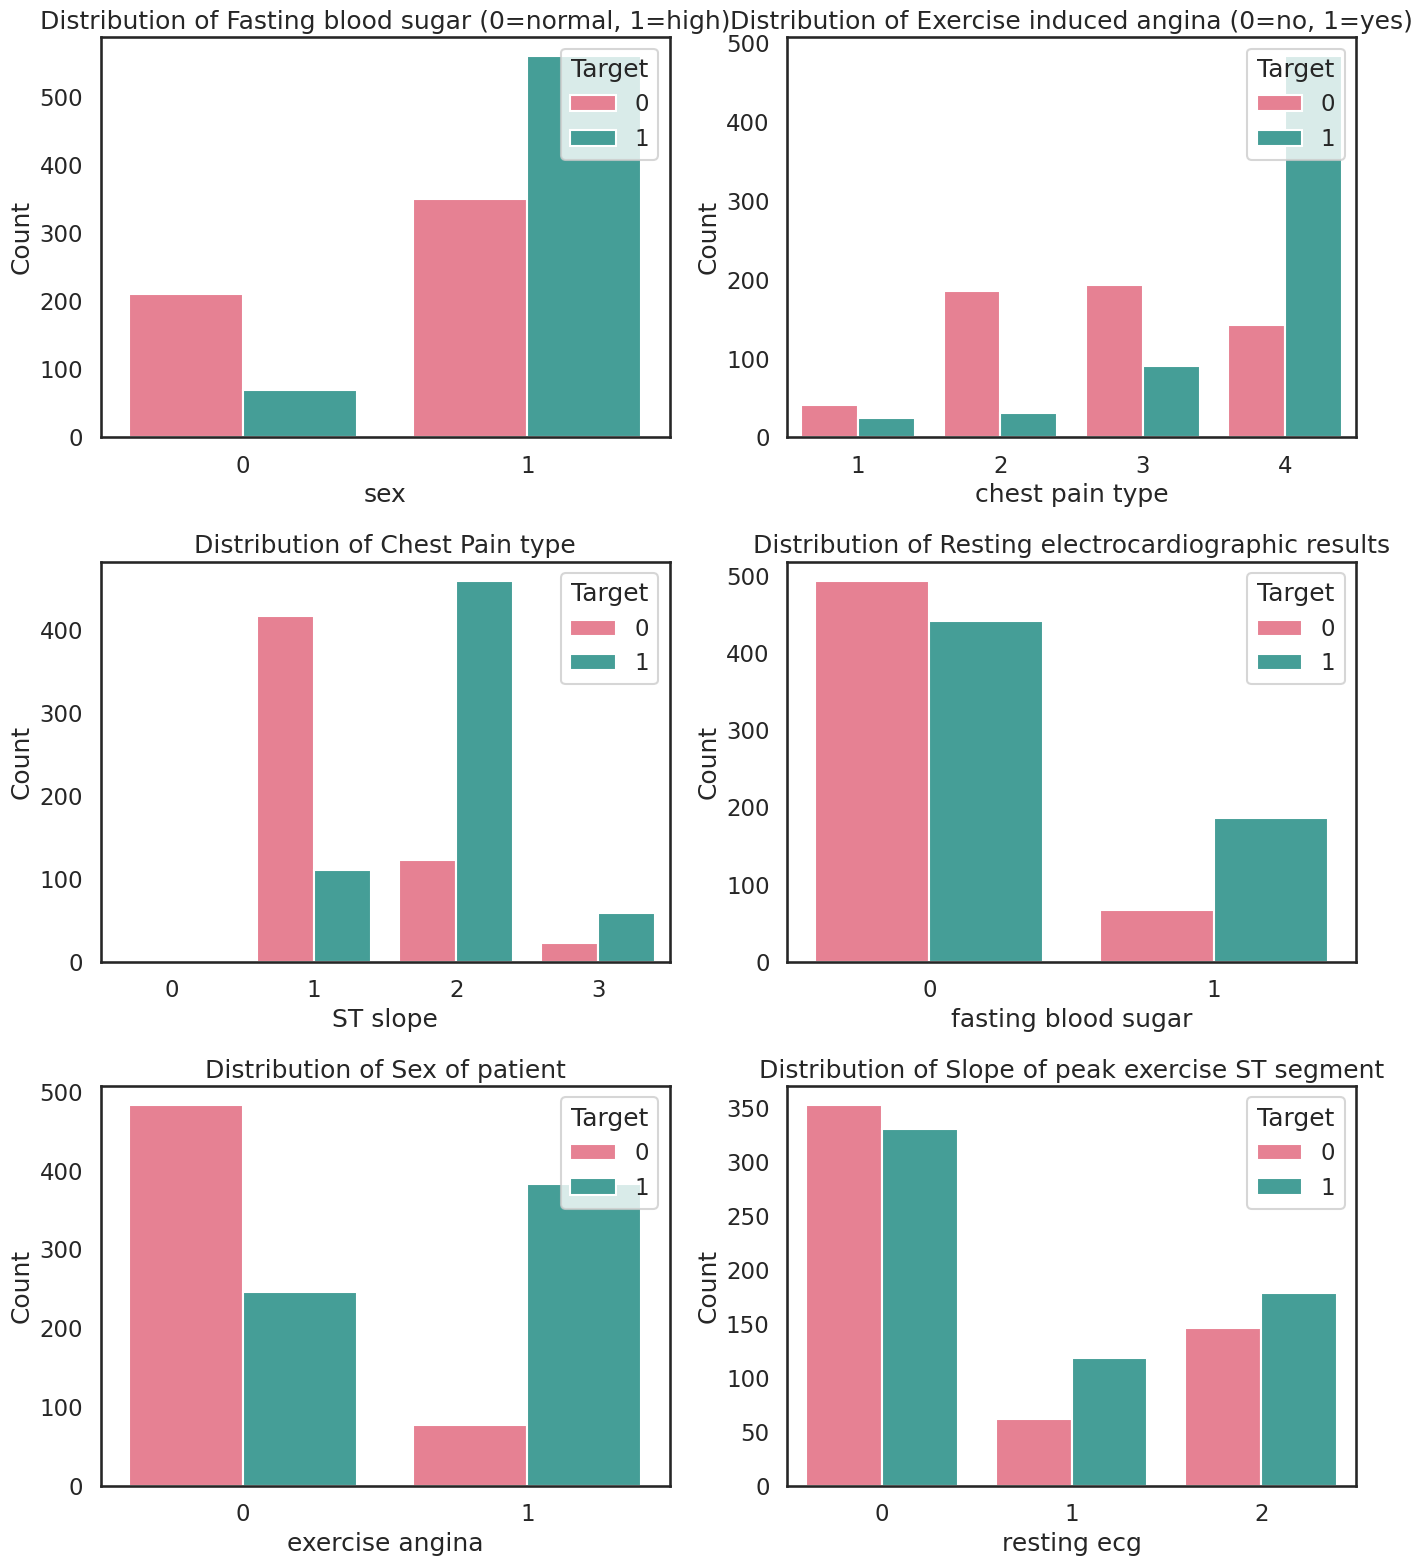

In [132]:
nominal_columns = list(set(df.columns) - set(num_columns))
nominal_columns.remove('target')
labels = ['Fasting blood sugar (0=normal, 1=high)', 'Exercise induced angina (0=no, 1=yes)',  'Chest Pain type',
          'Resting electrocardiographic results', 'Sex of patient', 'Slope of peak exercise ST segment']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(nominal_columns, labels)):
    sns.countplot(data=df, x=column, hue='target', ax=axes[i], palette='husl')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', loc='upper right')
    axes[i].set_title(f'Distribution of {label}')

plt.tight_layout()
plt.show()

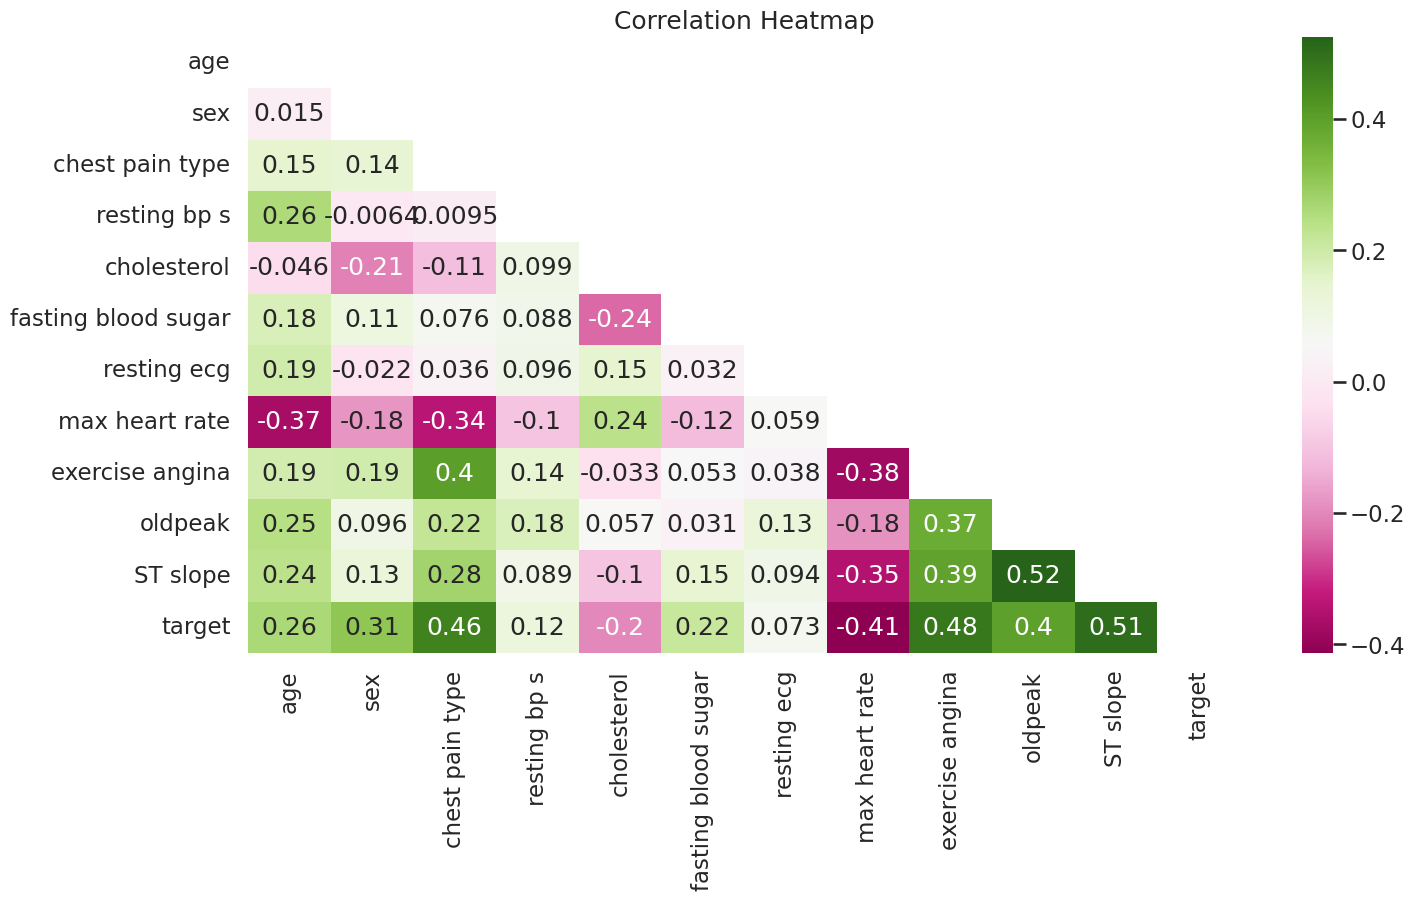

In [133]:
plt.figure(figsize=(16, 8))

corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, mask=mask)
plt.title('Correlation Heatmap')

plt.show()

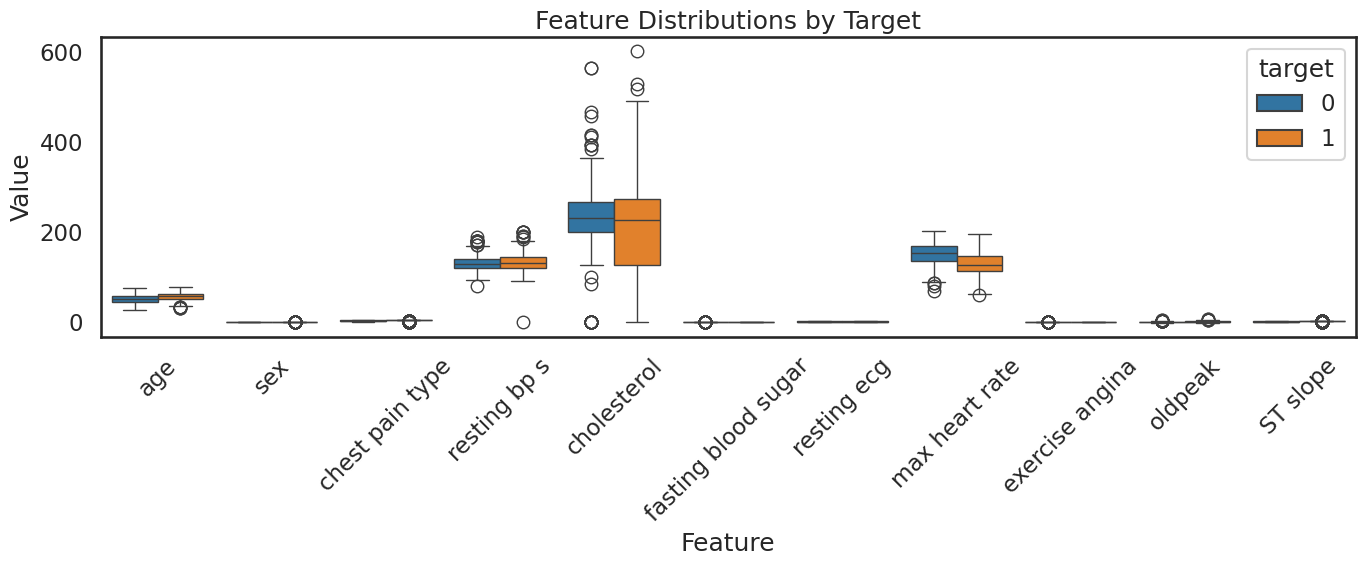

In [134]:
feature_names = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
                 'fasting blood sugar', 'resting ecg', 'max heart rate',
                 'exercise angina', 'oldpeak', 'ST slope']

# Melt the dataframe
df_melted = df[feature_names + ['target']].melt(id_vars='target',
                                                var_name='Feature',
                                                value_name='Value')

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', hue='target', data=df_melted)
plt.xticks(rotation=45)
plt.title('Feature Distributions by Target')
plt.tight_layout()
plt.show()

**Chest pain and target**:

Here is observed positive correlation, which makes sense: higher pain means higher risk to develop heart disease.

**Target**:

Positively correlated with ST slope, oldpeak, and exercise angina, indicating their association with heart disease.
Max Heart Rate: Exhibits negative correlation with most columns, suggesting an inverse relationship with other variables.
Resting ECG, Resting BP S, Fasting Blood Sugar, Cholesterol: Show low correlation with all columns, implying weaker associations with the target variable and other features.
Oldpeak and ST Slope: Display the highest positive correlation (0.52), suggesting a moderate to strong relationship between these two variables.



In [135]:
round(sum(df['cholesterol'] == 0) / len(df) * 100, 1)

14.5

In [136]:
df[df['cholesterol'] == 0]['target'].value_counts()

,count
target,
1,152
0,20


In [137]:
df[df['cholesterol'] == 0]['target'].value_counts(normalize=True)

,proportion
target,
1,0.883721
0,0.116279


In [138]:
df_no_zero_chol  = df[df.cholesterol != 0]
df_no_zero_chol['cholesterol'].describe()

,cholesterol
count,1018.000000
mean,245.906680
std,57.244599
min,85.000000
25%,209.000000
50%,240.000000
75%,276.000000
max,603.000000


In [139]:
df['cholesterol'].replace(0, 240, inplace=True)

In [140]:
round(sum(df['resting bp s'] == 0) / len(df) * 100, 3)

0.084

In [141]:
df[df['resting bp s'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,240,0,0,155,0,1.5,2,1


In [142]:
df['resting bp s'].describe()

,resting bp s
count,1190.000000
mean,132.153782
std,18.368823
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [143]:
df['resting bp s'].replace(0, 130, inplace=True)

In [144]:
round(sum(df['oldpeak'] < 0) / len(df) * 100, 1)

1.1

In [145]:
df['oldpeak'].describe()

,oldpeak
count,1190.000000
mean,0.922773
std,1.086337
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.600000
max,6.200000


In [146]:
df[df < 0] = 0.6

In [147]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [148]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

2

In [149]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [150]:
from sklearn.metrics import r2_score, classification_report,accuracy_score
y_pred = lr.predict(X_test)
print('r2_score',r2_score(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

r2_score 0.2864530456852793
accuracy_score 0.8235294117647058
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       160
           1       0.84      0.84      0.84       197

    accuracy                           0.82       357
   macro avg       0.82      0.82      0.82       357
weighted avg       0.82      0.82      0.82       357



In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
y_pred = rf.predict(X_test)
print('r2_score',r2_score(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, y_pred))

r2_score 0.6375634517766497
accuracy_score 0.9103641456582633


In [153]:
from xgboost import XGBClassifier
print(classification_report(y_test, y_pred))
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.91      0.93      0.92       197

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [154]:
y_pred = xgboost.predict(X_test)
print('r2_score',r2_score(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, y_pred))

r2_score 0.592258883248731
accuracy_score 0.8991596638655462


In [155]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [156]:
y_pred = dt.predict(X_test)
print('r2_score',r2_score(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, y_pred))

r2_score 0.3770621827411168
accuracy_score 0.84593837535014


In [157]:
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1,
                            max_features=max_features)

oob_list = list()

for n_trees in [15, 30, 50, 100, 150, 200, 300, 400, 500, 600]:

    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_

    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.141657
30.0,0.108043
50.0,0.091236
100.0,0.090036
150.0,0.086435
200.0,0.088836
300.0,0.082833
400.0,0.082833
500.0,0.082833


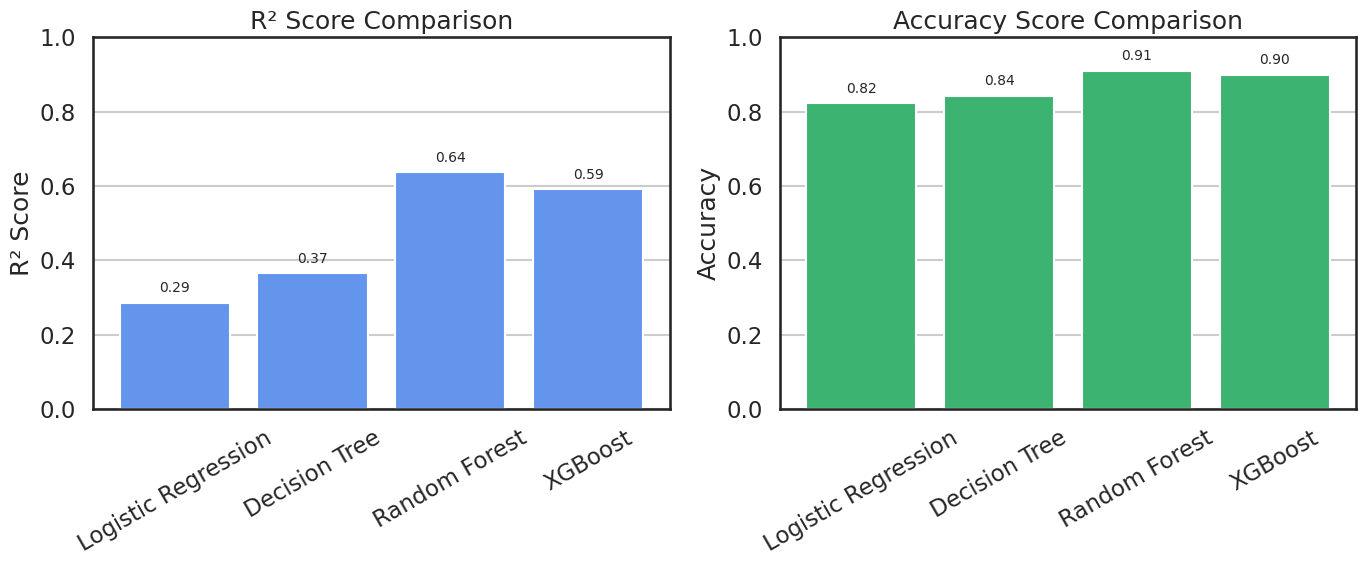

In [158]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
r2_scores = {}
acc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_scores[name] = accuracy_score(y_test, y_pred)
    r2_scores[name] = r2_score(y_test, y_pred)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].bar(r2_scores.keys(), r2_scores.values(), color='cornflowerblue')
axs[0].set_title("R² Score Comparison")
axs[0].set_ylim(0, 1)
axs[0].set_ylabel("R² Score")
axs[0].grid(True, axis='y')
axs[0].tick_params(axis='x', rotation=30)

for i, (name, val) in enumerate(r2_scores.items()):
    axs[0].text(i, val + 0.02, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

axs[1].bar(acc_scores.keys(), acc_scores.values(), color='mediumseagreen')
axs[1].set_title("Accuracy Score Comparison")
axs[1].set_ylim(0, 1)
axs[1].set_ylabel("Accuracy")
axs[1].grid(True, axis='y')
axs[1].tick_params(axis='x', rotation=30)

for i, (name, val) in enumerate(acc_scores.items()):
    axs[1].text(i, val + 0.02, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [159]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy with Best Estimator:", test_accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9099559916311956
Test Accuracy with Best Estimator: 0.9131652661064426
